<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-факторов,-оказывающих-наибольшее-влияние-на-стоимость-квартиры" data-toc-modified-id="Анализ-факторов,-оказывающих-наибольшее-влияние-на-стоимость-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ факторов, оказывающих наибольшее влияние на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-зависимости-стоимости-жилья-от-удаленности-от-центра" data-toc-modified-id="Анализ-зависимости-стоимости-жилья-от-удаленности-от-центра-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ зависимости стоимости жилья от удаленности от центра</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd



In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')

In [3]:
df.sample(n=10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13548,6,1500000.0,37.5,2018-02-08T00:00:00,1,2.60,5.0,17.1,1,NaN,...,8.30,1.0,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,315.0
33,8,4800000.0,73.0,2018-10-15T00:00:00,4,NaN,9.0,51.6,5,NaN,...,6.50,NaN,Колпино,26535.0,32321.0,0.0,NaN,0.0,NaN,92.0
18643,16,2720000.0,31.0,2019-02-28T00:00:00,1,NaN,3.0,17.2,2,NaN,...,5.60,1.0,посёлок Стрельна,27736.0,22624.0,2.0,213.0,3.0,59.0,62.0
23383,1,4950000.0,72.0,2016-07-02T00:00:00,3,NaN,12.0,48.0,1,False,...,7.00,0.0,Санкт-Петербург,33183.0,12258.0,1.0,684.0,0.0,NaN,156.0
19763,20,15000000.0,89.7,2018-09-28T00:00:00,3,2.80,20.0,55.0,4,NaN,...,14.20,NaN,Санкт-Петербург,17950.0,16952.0,1.0,679.0,3.0,361.0,15.0
6797,7,5150000.0,80.0,2017-09-22T00:00:00,3,NaN,9.0,49.0,6,NaN,...,11.50,NaN,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,112.0
6178,7,6100000.0,55.8,2019-04-01T00:00:00,3,2.45,5.0,40.7,2,NaN,...,5.20,NaN,Санкт-Петербург,39823.0,9082.0,2.0,430.0,0.0,NaN,8.0
9397,10,16073000.0,263.8,2019-01-30T00:00:00,3,NaN,19.0,NaN,4,NaN,...,23.42,NaN,Санкт-Петербург,18805.0,4400.0,0.0,NaN,0.0,NaN,35.0
6119,9,3300000.0,32.0,2019-02-07T00:00:00,1,2.50,5.0,18.0,3,NaN,...,6.00,1.0,Санкт-Петербург,42149.0,10972.0,2.0,287.0,0.0,NaN,56.0
5896,1,5694000.0,94.8,2018-10-29T00:00:00,3,2.80,9.0,53.4,1,False,...,16.30,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
df.ceiling_height.describe()      

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [8]:
df.query('ceiling_height>2 and ceiling_height<5').ceiling_height.describe()      

count    14453.000000
mean         2.725833
std          0.270519
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

In [9]:
df.query('living_area>total_area-6').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0


Text(0, 0.5, 'Количество объектов')

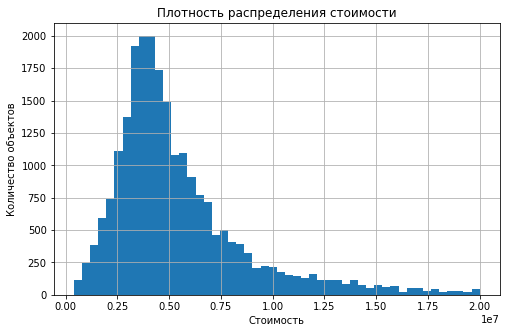

In [10]:
ax=df['last_price'].plot(kind='hist',bins=50, sharex= True,  range=(400*10**3, 2*10**7),figsize=(8,5), grid=True,  title='Плотность распределения стоимости')
ax.set_xlabel("Стоимость")
ax.set_ylabel("Количество объектов")

На графике представлено распределение стоимости жилья. Виден достаточно длинный хвост распределения с достаточно дорогими объектами.

In [11]:
df.last_price.describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [12]:
df.locality_name.value_counts(normalize=True).head(10)

Санкт-Петербург      0.664736
посёлок Мурино       0.022072
посёлок Шушары       0.018605
Всеволожск           0.016829
Пушкин               0.015603
Колпино              0.014292
посёлок Парголово    0.013827
Гатчина              0.012981
деревня Кудрово      0.012643
Выборг               0.010021
Name: locality_name, dtype: float64

### Выводы

Открыли файл, знак разделителя - табуляция. 
Данные не содержат дубликатов либо дубликаты сложно найти, так как отсутствует id  объектов. 
Некоторые столбцы имеют формат float, хотя по сути являются целочисленные: floors_total — всего этажей в доме, balcony — число балконов, days_exposition — сколько дней было размещено объявление (от публикации до снятия). Это вызвано наличием значений NaN. 
Также данные содержат большое количество пропусков. 
Данные по высоте потолков содержат некоторое количество некорректных данных: высота потолков меньше 2 метров и больше 5 метров, что крайне маловероятно в многоэтажных домах. 
В некоторых случаях жилая площадь почти равна общей, хотя в квартире должны быть коридор, санузел и, возможно, кухня. Коридор должен быть обязательно, так как, согласно существующим нормам, санузел не может выходить сразу в жилую комнату. Данное требование может не выполняться для апартаментов, но большинство объектов is_apartment = NaN. Поэтому формально имеются и нежилые помещения для которых так может быть.  
Самый важный параметр - цена квартиры, судя по статистике, внушает доверие, но в данных в тоже время могут быть выбросы, которые могут быть выявлены при детальном анализе. Медианная цена почти в полтора раза меньше чем средняя, что говорит о наличии объетов с высокой ценой, которые смещают среднюю в область более высоких цен. Также высокое значение стандартного отклонения, что также подтверждая вывод, что распределение не очень компактное. Видимо, так как содержит весьма неоднородные объекты.


## Предобработка данных

In [13]:
df = df.rename(columns={'cityCenters_nearest':'city_сenters_nearest'}) #Привели все названия столбцов к стандартному виду
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [14]:
df['balcony'] = df['balcony'].fillna(0) #Если балкон не указан, то будем считать что его нет
df['balcony'].isna().sum() 

0

In [15]:
# Высоты потолков выходящие за пределы здравого смысла заменили на среднюю высоту потолков. 
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())

df['ceiling_height'] = (
df['ceiling_height'].
    where(( ~((df['ceiling_height']>=5) | (df['ceiling_height']<2.2 ))),df['ceiling_height'].mean())
)

df['ceiling_height'].describe()

count    23699.000000
mean         2.743649
std          0.212426
min          2.200000
25%          2.600000
50%          2.771499
75%          2.771499
max          4.900000
Name: ceiling_height, dtype: float64

### Выводы

Переименовали название одной колонки. Пропуски в колонке balcony  заменили на 0 балконов. Пропуски колонке ceiling_height, высота потолков заменили на среднюю высоту. Значения высоты потолков привели к значениям в соответствии со здравым смыслом. Больше замен пропуском в других столбцах сделать сложно без дополнительной информации. Пропуски скорее всего появились из-за ошибок заполнения или просто данные поля не заполнили при подаче объявления о продаже квартиры. Перевести целочисленный формат для некоторых столбцов мешают значения NaN, которые непонятно на что заменять. Можно заменить на -1, но пока непонятно нужно ли это в рамках текущего проекта

## Расчёты и добавление результатов в таблицу

In [16]:
df.iloc[8793, 1]= 12190*1000 #убрали выброс (квартира в СПб больше 100 кв. м. - стоимость в районе как раз 12 млн.) 
df['price_m2'] = df['last_price']/df['total_area']
df['price_m2'].describe()

count    2.369900e+04
mean     9.942637e+04
std      5.030273e+04
min      7.962963e+03
25%      7.659967e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_m2, dtype: float64

In [17]:
#заменили NaN в столбце с общим количеством этажей на номер этажа удвоенный на 2: квартира расположена на среднем этаже
df.loc[:,'floors_total'] = df.loc[:,'floors_total'].fillna(2*df['floor']) 

#привели столбец с общим количеством этажей к целочисленному типу чтобы удобнее было работать
df['floors_total'] = df['floors_total'].astype('int')

def floor_def(row):
    #функция для категоризации этажа в квартирах
    if row['floors_total']== row['floor']:
        return 'Последний'
    elif row['floor']==1:
        return 'Первый'
    return 'Другой'
# Создали новый столбец с категориями этажа    
df['floor_def_columns'] = df.apply(floor_def, axis=1)

# Проверили что все получилось 
df['floor_def_columns'].count()

23699

In [18]:
#перевели столбец в формат "дата и время".
FORMAT='%Y-%m-%dT%H:%M:%S'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format=FORMAT)

In [19]:
#дополнительно ввели новые столбцы с днем недели, месяцом и годом подачи объявления. 
df['week_day'] = df['first_day_exposition'].dt.weekday
df['mouth'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [20]:
# Добавили столбец с отношением жилой и общей площади
df['living_ratio'] = df['living_area']/df['total_area']

In [21]:
# Добавили столбец с отношением площади кухни и общей площади
df['kitchen_ratio'] = df['kitchen_area']/df['total_area']


### Выводы

- Добавили следующие столбцы:
    - цена квадратного метра;
    - день недели, месяц и год публикации объявления;
    - этаж квартиры; 
    - соотношение жилой и общей площади;
    - отношение площади кухни к общей.
- Заменили пропуски в столбце с общим количество этажей на указанный этаж, умноженное на два: ввели допущение что мы на среднем этаже.


## Исследовательский анализ данных

**Площадь квартир**

Text(0, 0.5, 'Количество объектов')

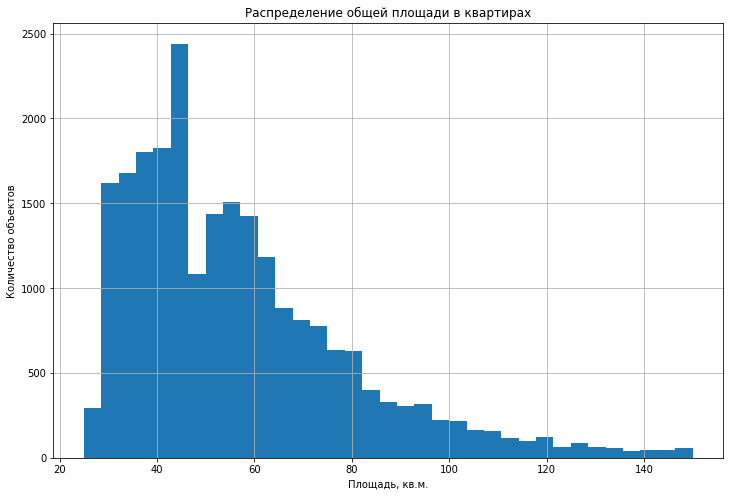

In [22]:
ax= df['total_area'].plot(kind='hist',bins=35, range=(25,150), figsize=(12,8), title='Распределение общей площади в квартирах', grid=True)
ax.set_xlabel("Площадь, кв.м.")
ax.set_ylabel("Количество объектов")

In [23]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Основная масса объектов имеет площадь меньше 82 метров. Имеется большой хвост распределения, увеличивающий стандартное отклонение и среднюю. Выбросов нет, данные похожи на достоверные.
Кажется смешным, но на рынке недвижимости есть квартиры площадью от 12 м и они пользуются спросом.
 

**Цена квартиры**

Text(0, 0.5, 'Количество объектов')

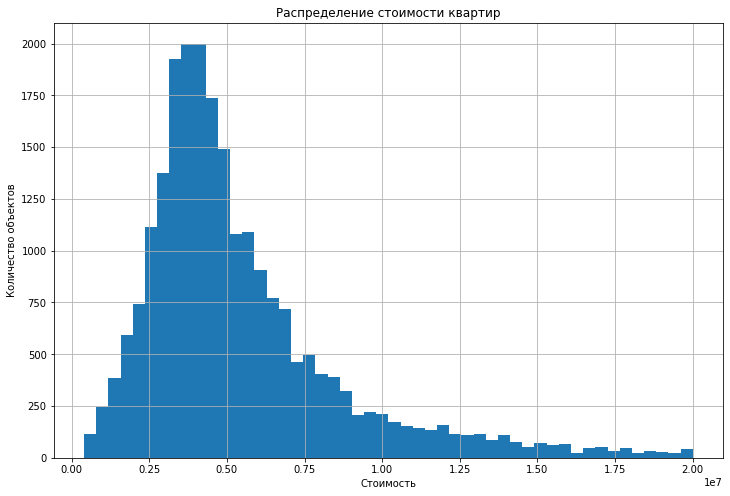

In [24]:
ax= df['last_price'].plot(kind='hist',bins=50, sharex= True,  range=(400*10**3, 2*10**7),figsize=(12,8), grid=True, title='Распределение стоимости квартир')
ax.set_xlabel("Стоимость")
ax.set_ylabel("Количество объектов")

In [25]:
df['last_price'].describe()

count    2.369900e+04
mean     6.542063e+06
std      1.088699e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Цена квартир имеет достаточно компактное распределение основной массы объектов. Межквартильный размах составляет 3.4 млн. Стандартное отклонение существенно завышено за счет большо хвоста распределения. Также смещена и средняя, которая существенно больше медианы. Выбросов нет, данные похожи на достоверные. 

**Число комнат**

In [26]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [27]:
df=df[df['rooms']<7]

Text(0, 0.5, 'Количество объектов')

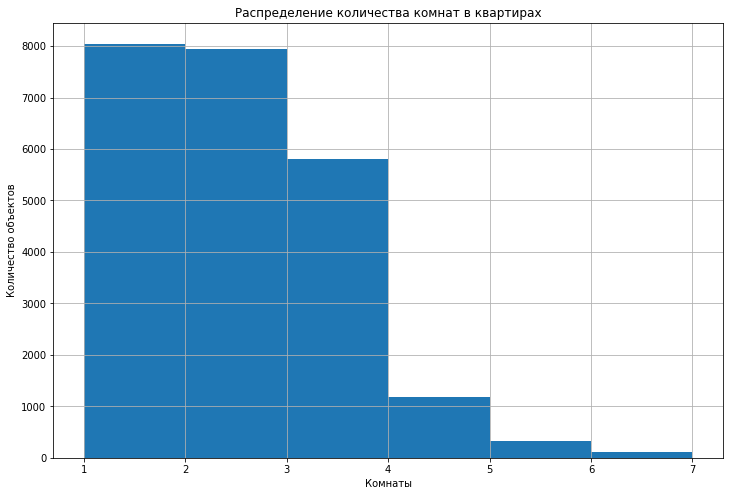

In [28]:
ax= df['rooms'].plot(kind='hist',range=(1,7), bins=6, figsize=(12,8), grid=True,  title='Распределение количества комнат в квартирах')
ax.set_xlabel("Комнаты")
ax.set_ylabel("Количество объектов")

Ограничили число комнта до 6 включительно, так как для большего количества комнат данных мало. 

**Высота потолков**

In [29]:
df['ceiling_height'].describe()

count    23609.000000
mean         2.741946
std          0.209465
min          2.200000
25%          2.600000
50%          2.771499
75%          2.771499
max          4.900000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Количество объектов')

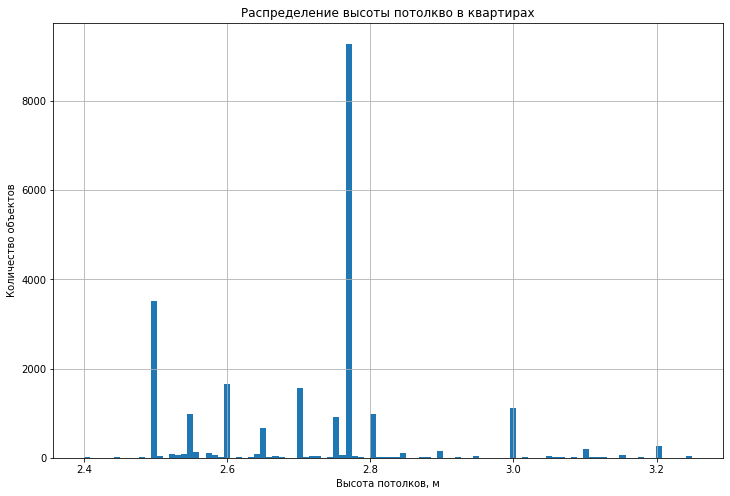

In [30]:
ax=df['ceiling_height'].plot(kind='hist',range=(2.4,3.25), bins=100, figsize=(12,8), grid=True,  title='Распределение высоты потолкво в квартирах')
ax.set_xlabel("Высота потолков, м")
ax.set_ylabel("Количество объектов")


Очистку данных провели выше. График показывает, что высота потолков имеет явные пики, что объясняется какими-то стандартными величинами которые были приняты при строительстве. 2.5 - хрущевки, 2.77 - более качественное и современное жилье. 3.1 - сталинки.

**Время продажи квартиры**

In [31]:
ax=df['days_exposition'].describe()


Text(0, 0.5, 'Количество объектов')

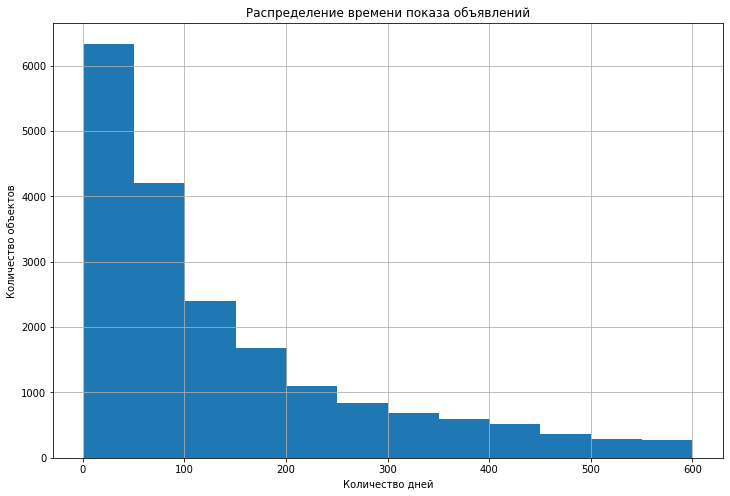

In [32]:
ax=df['days_exposition'].plot(kind='hist',range=(1,600), bins=12, figsize=(12,8), grid=True,  title='Распределение времени показа объявлений')
ax.set_xlabel("Количество дней")
ax.set_ylabel("Количество объектов")


В среднем продажа квартиры занимает 181 день. Но медиана составляет 95 дней. Что говорит о том, что существует группа объектов, которые не находят покупателя достаточно долго. Если квартира была продана меньше чем за 1.5 месяца, то можно говорить, что продажа прошла быстро. Если продажа происходит больше 231 дней, то объект продается долго.


In [33]:
df=df[df['days_exposition']<500] 

Text(0, 0.5, 'Количество объектов')

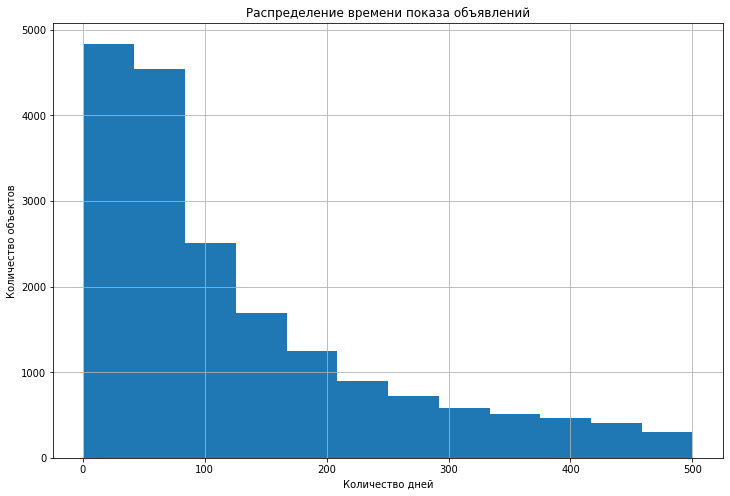

In [34]:
ax=df['days_exposition'].plot(kind='hist',range=(1,500), bins=12, figsize=(12,8), grid=True,  title='Распределение времени показа объявлений')
ax.set_xlabel("Количество дней")
ax.set_ylabel("Количество объектов")

Text(0, 0.5, 'Количество объектов')

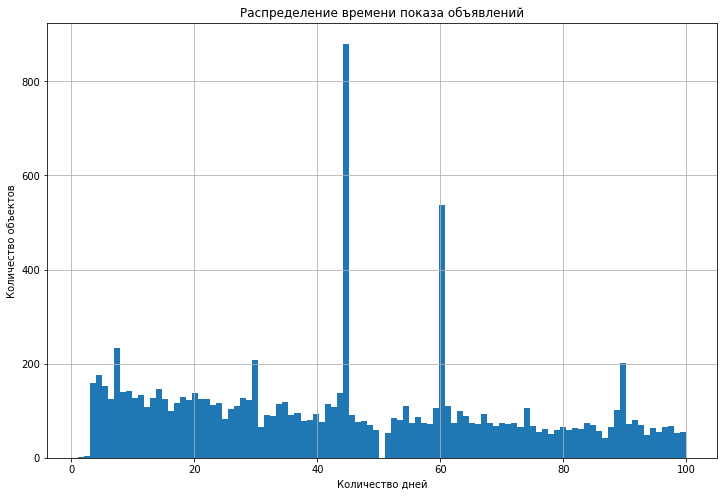

In [35]:
ax=df['days_exposition'].plot(kind='hist',range=(1,100), bins=101, figsize=(12,8), grid=True,  title='Распределение времени показа объявлений')
ax.set_xlabel("Количество дней")
ax.set_ylabel("Количество объектов")


In [36]:
df[df['days_exposition']<100]['days_exposition'].value_counts(normalize=True)

45.0    0.083913
60.0    0.051302
7.0     0.022218
30.0    0.019834
90.0    0.019167
          ...   
78.0    0.004863
94.0    0.004672
87.0    0.004100
2.0     0.000286
1.0     0.000095
Name: days_exposition, Length: 99, dtype: float64

45 дней явно выбивается из общей статистики, это ровно 1.5 месяца и здесь, наверное, какая-то техническая или юридическая особенность в данных. Я бы оставил как есть, если нет возможности уточнить по этому поводу у технических специалистов по данной базе данных либо у тех, кто знает логику работы как данные собирались. Также выделяются 7, 60, 30 и 90. Наиболее вероятно, что эта база платных объявлений, и продавцы просто не продлили подписку на услугу. 

In [37]:
df['days_exposition'].describe()

count    18713.000000
mean       126.950248
std        119.056371
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

После удаления объектов с очень длительной продажей медиана уменьшилась на 11 дней, а средняя упала почти в 1.5 раза. Тем самым мы избавились от длинного хвоста распределения. Объекты с очень длительной продажей выбивались из общей массы квартир. Скорее всего либо объекты были уникальные, либо их цена была слишком завышена, а продавец не хотел опускать цену. 
Мы потеряли около 10 % данных, но эти данные могли быть не очень достоверные, так как по ним очень долго не были найдены покупатели и они явно не идут в общем тренде, но могут исказить выводы.


### Анализ факторов, оказывающих наибольшее влияние на стоимость квартиры

In [38]:
df.corr()['last_price'].sort_values(ascending=False)


last_price              1.000000
price_m2                0.742751
total_area              0.664087
living_area             0.568640
kitchen_area            0.466774
rooms                   0.355503
ceiling_height          0.276471
ponds_around3000        0.165160
parks_around3000        0.161431
total_images            0.104599
days_exposition         0.076551
floor                   0.029433
balcony                 0.021957
floors_total            0.006247
week_day                0.005678
parks_nearest           0.003607
living_ratio           -0.002153
open_plan              -0.008442
mouth                  -0.008810
airports_nearest       -0.024408
studio                 -0.030447
year                   -0.038587
kitchen_ratio          -0.086729
ponds_nearest          -0.094342
city_сenters_nearest   -0.221222
Name: last_price, dtype: float64

**Итоги анализа факторов, оказывающих наибольшее влияние на стоимость жилья.**

- Наибольшая корреляция между ценой и следующими величинами: 
    - стоимость квадратного метра - 0.74
    - общей площадью - 0.66, 
    - жилой площадью - 0.57, 
    - площадью кухни - 0.47,
Меньшее влияние оказывают следующие факторы:    
    - количеством комнат - 0.36, 
    - высотой потолков - 0.27
    - удаленностью от центра - минус 0.22

Также некоторое небольшое влияние оказывают:
    парки, количество фотографий в объявлении, пруды.
Стоимость квартиры не зависит от дня недели, месяца и года размещения объявления.
Также стоимость жилья сильно коррелирует со стоимостью квадратного метра, но тут связь обратная: стоимость жилья определяет цену за квадратный метр, а не наоборот, по моему скромному мнению.


**Зависимость цены от того, на каком этаже расположена квартира**

In [39]:
df.groupby('floor_def_columns')['last_price'].agg(['median', 'mean'])

,median,mean
floor_def_columns,,
Другой,4630000.0,6.090411e+06
Первый,3794500.0,4.386694e+06
Последний,4200000.0,6.204837e+06


In [40]:
df.query('last_price<20000000').groupby('floor_def_columns')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
floor_def_columns,,,,,,,,
Другой,13660.0,5.382879e+06,2.952873e+06,450000.0,3500000.0,4599000.0,6396000.00,19999000.0
Первый,2189.0,4.176028e+06,2.354216e+06,440000.0,2700000.0,3750000.0,5000000.00,19327000.0
Последний,2482.0,4.902299e+06,3.115823e+06,430000.0,2950000.0,4100000.0,5947772.75,19900000.0


In [41]:
df.query('last_price>20000000').groupby('floor_def_columns')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
floor_def_columns,,,,,,,,
Другой,284.0,3.982781e+07,3.287008e+07,20040000.0,23900000.0,29000000.0,40000000.0,330000000.0
Первый,16.0,3.028090e+07,1.231969e+07,20295200.0,21000000.0,25600000.0,34502750.0,55900000.0
Последний,73.0,5.049114e+07,5.927633e+07,20300000.0,24719904.0,28521092.0,45900000.0,401300000.0


In [42]:
df.query('last_price>40000000').groupby('floor_def_columns')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
floor_def_columns,,,,,,,,
Другой,64.0,8.166419e+07,4.938942e+07,40348248.0,51750000.0,64950000.0,95000000.0,330000000.0
Первый,4.0,4.982775e+07,5.059922e+06,43511000.0,48302750.0,49950000.0,51475000.0,55900000.0
Последний,19.0,1.157405e+08,8.875150e+07,45900000.0,64745000.0,87000000.0,121740000.0,401300000.0


Text(0, 0.5, 'Количество объектов')

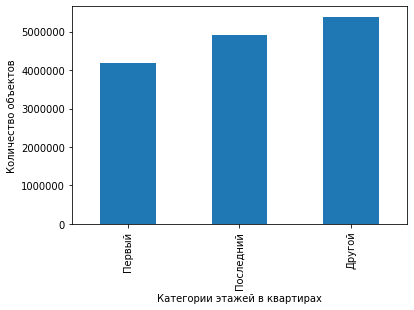

In [43]:

ax=df.query('last_price<20000000').groupby('floor_def_columns')['last_price'].agg(['mean']).sort_values(by='mean').plot(kind='bar', legend=False)
ax.set_xlabel("Категории этажей в квартирах")
ax.set_ylabel("Количество объектов")

Text(0, 0.5, 'Количество объектов')

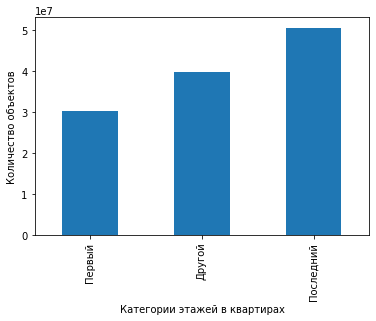

In [44]:
ax=df.query('last_price>20000000').groupby('floor_def_columns')['last_price'].agg(['mean']).sort_values(by='mean').plot(kind='bar', legend=False)
ax.set_xlabel("Категории этажей в квартирах")
ax.set_ylabel("Количество объектов")

**Новый вывод** 

Квартиры на первом этаже самые дешевые. В сегменте не элитного жилья больше нравятся квартиры "не первый, не последний", а вот в элитном сегменте больше ценятся квартиры на последних этажах. 

**10 населённых пунктов с наибольшим числом объявлений**

In [45]:
df.pivot_table(index='locality_name', values='price_m2', aggfunc=('mean', 'count')).sort_values(by='count', ascending =False).head(10).sort_values(by='mean', ascending =False)

,count,mean
locality_name,,
Санкт-Петербург,12369,111309.027882
Пушкин,277,101857.048707
деревня Кудрово,266,92656.981467
посёлок Парголово,286,89360.980969
посёлок Мурино,485,86070.054278
посёлок Шушары,385,77938.483694
Колпино,292,74671.949419
Всеволожск,308,68605.620450
Гатчина,244,68065.179716


#### Выводы

Наибольшая стоимость квадратного метра в СПб и его пригородах. Названия "деревня" или "поселок" обманчивы, зачастую везде есть метро или в ближайшее время появится. От Колпино ходит электричка до Московского вокзала, но стоимость достаточно низаная из-за большого количества устаревшего жилья. Мурино имеет метро, но данный район превращается в район для проживания людей, снимающих дешевое жилье. Значительное влияние оказывает большое количество парков, в частности для Пушкина. У Кудрово хорошая транспортная доступность и большое количество новостроек. Парголова имеет также хорошую транспортную доступность и расположен на Севере, где традиционно более высокая стоимость жилья. Шушары имеет станцию метро, но район традиционно развивался как эконом-класс жилья. Гатчина достаточно далеко от СПб, но еще позволяет работать в Питер, но значительное число устаревшего жилья снижает среднюю стоимость жилья. Выборг уже значительно удален от СПб, что затрудняет возможность работы в СПб.

### Анализ зависимости стоимости жилья от удаленности от центра

In [46]:
#Создали DataFrame с объектами имеющими даннные о дальности до центра и расположенные в СПб
df_spb = df[(df['locality_name']=='Санкт-Петербург') & (~(df['city_сenters_nearest'].isna()))].copy()

In [47]:
#Создали стобец с целью категоризации объектов по дальности от центра, перевели в км, поменяли тип на целочисленный
df_spb.loc[:,'city_сenters_km']=((df_spb.loc[:,'city_сenters_nearest'])*0.001).round().astype('int')

Text(0, 0.5, 'Средная стоиость квартир')

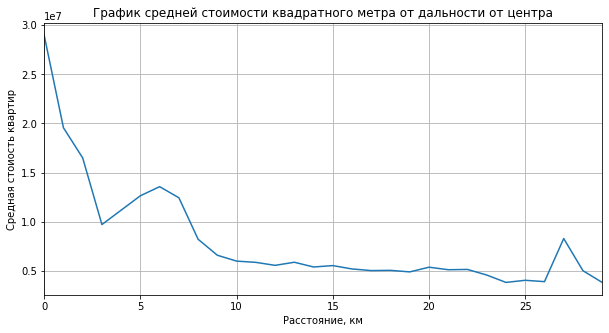

In [48]:
#Создали сводную таблицу 
ax=df_spb.pivot_table(columns='city_сenters_km',  values='last_price', aggfunc='mean').T.plot(grid=True, figsize=(10,5), legend=False, title='График средней стоимости квадратного метра от дальности от центра')
ax.set_xlabel("Расстояние, км")
ax.set_ylabel("Средная стоиость квартир")

На основе анализа стоимости квадратного метра и стоимости жилья можно сделать вывод, что скорее всего центр Питера это около 3 км в радиусе. Именно в этой точке график резко изгибается. Более явно центр "виден" на графике со стоимостью жилья, чем на графике цены квадратного метра, так как в центре квартире не только дороже, но и больше по площади. 

In [49]:
#Создали новый датасет из объектов в СПб на дальности не более 3000 км от центра
df_centre = df_spb[df_spb['city_сenters_nearest']<3000] 

In [50]:
useful_cols = ['last_price', 'total_area', 'living_area', 'kitchen_area',  'rooms', 'ceiling_height', 'days_exposition', 'floor','floors_total', 'balcony']
#Создали таблицу со средними и медианными значениями для центра СПб по наиболее важным параметрам
df_centre[useful_cols].agg(['median', 'mean'])

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,days_exposition,floor,floors_total,balcony
median,9.350000e+06,83.000000,50.00000,11.50000,3.000000,3.000000,106.000000,3.000000,5.0000,0.000000
mean,1.657942e+07,93.393783,58.50975,14.65336,2.938534,3.064899,153.891253,3.033097,4.8487,0.111111


In [51]:
#Создали таблицу со средними и медианными значениями для всего СПб по наиболее важным параметрам с цлеью сравнения с центром
df[df['locality_name']=='Санкт-Петербург'][useful_cols].agg(['median', 'mean'])

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,days_exposition,floor,floors_total,balcony
median,5.200000e+06,52.00000,30.30000,9.500000,2.000000,2.771499,84.000000,5.000000,9.000000,0.000000
mean,7.148810e+06,60.44836,34.34921,10.685632,2.061363,2.751216,125.688576,6.340044,11.639745,0.596087


**Выводы по анализу квартир в центре Питера и сравнение с квартирами за весь СПб**

Существенно выше цена квартир в центре: в центре в среднем - 16.6 млн. рублей, а в целом по Питеру - 7.15 млн. рублей. В центре Питера квартиры существенно больше: средняя площадь в центре 93,5, а в целом по Питеру 60 км. м. Медианная площадь 83 и 52 соответственно.  Также в центре больше кухни. Квартиры в центре — это обычно трешки, а в целом по Питеру - двушки. Также чуть выше высота потолков в центре примерно на 25 см. Дома в центре Питере существенно ниже. В центре большая редкость наличие балкона. 
Если в целом по Питеру преобладает жилье построенное в 60-80ые года, с массовой застройкой дешевым жильем, а также дома эконом-класс, построенные в 21 веке. То центр Питера застроен дореволюционными зданиями и квартиры в центре относятся к классу элитного жилья.
 

**Сравнение корреляции наиболее важных параметров для центра Питера и всего СПб**

In [52]:
#Создали таблицы с коэффициентами корреляции
df_spd_corr=df_centre.corr()
df_corr=df.corr()

#добавили в таблицу с коэффициентами корреляции столбец с корреляцией для цены
df_spd_corr['spd_corr_total_spb'] = df_corr['last_price']

#оставили только нужные столбцы
df_spd_corr = df_spd_corr[['spd_corr_total_spb','last_price']]

#переименовали столбец для лучего понимания 
df_spd_corr = df_spd_corr.rename(columns={'last_price':'centre_spb_corr'})

df_spd_corr['comparison_%']=100*df_spd_corr['centre_spb_corr']/df_spd_corr['spd_corr_total_spb']
df_spd_corr.query('centre_spb_corr>0.1').sort_values(by='centre_spb_corr', ascending=False)

,spd_corr_total_spb,centre_spb_corr,comparison_%
last_price,1.000000,1.000000,100.000000
price_m2,0.742751,0.872027,117.405148
total_area,0.664087,0.616609,92.850539
living_area,0.568640,0.499581,87.855436
kitchen_area,0.466774,0.356444,76.363296
balcony,0.021957,0.306990,1398.121971
floor,0.029433,0.275847,937.190652
rooms,0.355503,0.262772,73.915640
floors_total,0.006247,0.250209,4005.091598
total_images,0.104599,0.163818,156.615928


Для квартир в центре СПб значительно больше ценится балкон, этаж (чем выше - тем дороже), общая высота дома (чем выше - тем дороже). Также больше влияет на квартиры в центре количество фотографий в объявлении. Меньше влияет на цену общая площадь, жилая площадь, площадь кухни, число комнат. Высота этажа имеет такое важно значения исходя из того, что квартиры расположены в шумном и загазованном центре и чем выше, то тем немного меньше шума и меньше выхлопных газов. Считается, что выхлопные газы тяжелее воздуха и не поднимаются выше 5-7 этажа. Также весьма статусно выйти с бокалом Chateau Lafite и посметь на суетный город сверху вниз.

## Общий вывод

- Основная масса объектов имеет площадь меньше 82 метров. Но на рынке недвижимости есть квартиры площадью от 12 м.  На рынке наибольшее количество 1- и 2-комнатых квартир, немного меньше 3-комнатных.  Наиболее распространенная высота потолков в квартирах около 2.77 м. Также есть достаточно много квартир с высотой потолков 2.5-2.6 м и около 3.1. 
- В среднем продажа квартиры занимает 181 день. Но медиана составляет 95 дней. Если квартира была продана меньше чем за 1.5 месяца, то можно говорить, что продажа прошла быстро. Если продана происходит больше 231 дней, то объект продается долго. Пик продажи квартир в 45 дней явно выбивается из общей статистики, это ровно 1.5 месяца и здесь, наверное, какая-то техническая или юридическая особенность в данных.
- Наибольшая корреляция между ценой и следующими величинами: 
    - стоимость квадратного метра 0.74
    - общей площадью - 0.66, 
    - жилой площадью 0.57, 
    - площадью кухни - 0.47, 
- Меньшее влияние оказывают следующие факторы:
    - количеством комнат 0.36,
    - высотой потолков 0.27 
    - удаленностью от центра минус 0.22
    - Также некоторое небольшое влияние оказывают: парки, количество фотографий в объявлении, пруды. 
- Стоимость квартиры не зависит от дня недели, месяца и года размещения объявления. 
- Также стоимость жилья сильно коррелирует со стоимостью квадратного метра, но тут связь обратная: стоимость жилья определяет цену за квадратный метр.
- Квартиры на первом этаже самые дешевые. В сегменте неэлитного жилья больше нравятся квартиры "не первый, не последний", а вот в элитном сегменте больше ценятся квартиры на последних этажах.
- Наибольшая стоимость квадратного метра в СПб и его пригородах. Названия "деревня" или "поселок" обманчивы, зачастую везде есть метро или в ближайшее время появится. От Колпино ходит электричка до Московского вокзала, но стоимость достаточно низаная из-за большого количества устаревшего жилья. Мурино имеет метро, но данный район превращается в район для проживания людей, снимающих дешевое жилье. Значительное влияние оказывает большое количество парков, в частности для Пушкина. У Кудрово хорошая транспортная доступность и большое количество новостроек. Парголова имеет также хорошую транспортную доступность и расположен на Севере, где традиционно более высокая стоимость жилья. Шушары имеет станцию метро, но район традиционно развивался как эконом-класс жилья. Гатчина достаточно далеко от СПб, но еще позволяет работать в Питер, но значительное число устаревшего жилья снижает среднюю стоимость жилья. Выборг уже значительно удален от СПб, что затрудняет возможность работы в СПб.
- На основе анализа стоимости квадратного метра и стоимости жилья можно сделать вывод, что скорее всего центр Питера это около 3 км в радиусе. Именно в этой точке график резко изгибается. Более явно центр "виден" на графике со стоимостью жилья.
- Существенно выше цена квартир в центре: в центре в среднем - 16.6 млн. рублей, а в целом по Питеру - 7.15 млн. рублей. В центре Питера квартиры существенно больше: средняя площадь в центре 93,5, а в целом по Питеру 60 км. м. Медианная площадь 83 и 52 соответственно.  Также в центре больше кухни. Квартиры в центре — это обычно трешки, а в целом по Питеру - двушки. Также чуть выше высота потолков в центре примерно на 25 см. Дома в центре Питере существенно ниже. В центре большая редкость наличие балкона. 
- Для квартир в центре СПб значительно больше ценится балкон, этаж (чем выше - тем дороже), общая высота дома (чем выше - тем дороже). Также больше влияет на квартиры в центре количество фотографий в объявлении. Меньше влияет на цену общая площадь, жилая площадь, площадь кухни, число комнат. 
